In [1]:
using PastaQ
using ITensors
using Plots
using StatsPlots

In [2]:
# Define our gates

function PastaQ.gate(::GateName"R"; theta::Real, phi::Real)
    [
        cos(theta/2)    (-im * exp(-im * phi) * sin(theta/2))
        (-im * exp(im * phi) * sin(theta/2))     cos(theta/2)
    ]
end

function PastaQ.gate(::GateName"M"; Theta::Real)
    [
        cos(Theta)    0    0    (-im * sin(Theta))
        0    cos(Theta)    (-im * sin(Theta))    0
        0    (-im * sin(Theta))    cos(Theta)    0
        (-im * sin(Theta))    0    0    cos(Theta)
    ]
end

function PastaQ.gate(::GateName"Z";)
    [
        1.00    0
        0     -1.00
    ]
end

function PastaQ.gate(::GateName"X";)
    [
        0    1.00
        1.00     0
    ]
end

In [3]:
function run(N, depth, flipon)
    # Random circuit.
    gates = Vector{Tuple}[]
    if flipon == true
        td=rand(1:depth)
        tN=rand(1:N)
    end
    for i in 1:depth
        one_qubit_layer = Tuple[]
        two_qubit_layer = Tuple[]
        
        for j in 1:N
            gate = ("R", j, (theta=2pi*rand(), phi=2pi*rand()))
            push!(one_qubit_layer, gate)
            if flipon == true
                if j==tN && i==td
                    push!(one_qubit_layer, ("X", j))
                end
            end
        end

        # Alternate start qubit for pairs.
        idx_first = i % 2 + 1

        for j in idx_first:2:(N-1)
            gate = ("M", (j, j+1), (Theta=2pi*rand(),))
            push!(two_qubit_layer, gate)
        end
        
        push!(gates, one_qubit_layer)
        push!(gates, two_qubit_layer)
            
    end
    psi = runcircuit(N, gates)
end

run (generic function with 1 method)

In [4]:
function get_Probs(psi,N)      
    sites = siteinds("S=1/2", N)
    norm=0
    probs=zeros(0)
    for i=0:2^N-1
        x=digits(i,base=2,pad=N)
        states = [j+1 for j in x]
        phi = productMPS(ComplexF64,sites, states)
        y=inner(phi,psi)
        prob=y*conj(y)
        append!(probs,prob)
        norm=norm+prob
    end
    return probs
end        

get_Probs (generic function with 1 method)

In [5]:
# TASK 1
N=4
depth=4
flipon=false
psi=run(N,depth,flipon)
pb=get_Probs(psi,N)

yy=zeros(0)
for i=1:length(pb)
    append!(yy,2.0)
end

scatter!(yy, ms = 50*pb, ylims=[1.5,3.5], legend=false, ticks=nothing)

0.027196562880579898 + 0.0im
0.10822852300253927 + 0.0im
0.07793069675309353 + 0.0im
0.08417776663833115 + 0.0im
0.1476362129733695 + 0.0im
0.10490230230460584 + 0.0im
0.28259309980001457 + 0.0im
0.16733483564746504 + 0.0im
0.9999999999999989 + 0.0im


8-element Vector{Float64}:
 0.027196562880579898
 0.10822852300253927
 0.07793069675309353
 0.08417776663833115
 0.1476362129733695
 0.10490230230460584
 0.28259309980001457
 0.16733483564746504

In [6]:
# Task 2
function runcirc_multiple(M,N,depth,flipon)
    results=Tuple[]
    for i=1:M
        psi=run(N,depth,flipon)
        push!(results,get_Probs(psi,N))
    end
    return results
end

runcirc_multiple (generic function with 1 method)

In [7]:
yy=zeros(0)
for i=1:length(pb)
    append!(yy,2.0)
end

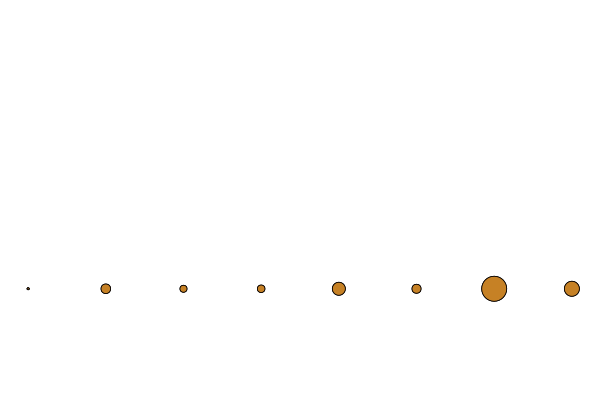

In [16]:
scatter!(yy, ms = 50*pb, ylims=[1.5,3.5], legend=false, ticks=nothing)